Implement a simulation that can assist to study the birthday paradox. 

You may follow the link to learn more about it, but for this assignment here's what you need to do:

Suppose there are $n$ people in a room. How large does have $n$ have to be in order for the probability that there are at least 3 people with their birthdays within the same calendar week to be more than 0.5? You should include a visualisation in your answer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import default_rng
import pandas as pd

In [2]:
# assigning no. of weeks
weeks = np.arange(1,53)
weeks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [3]:
# This line generates random number between 0-53(as specified by the weeks variable) of desired size
# change the value of size from 30 to other number and run the cell. You'll understand what the code is doinf
rng = default_rng()
a = rng.choice(weeks, size=30, replace=True)
a

array([45, 37, 14, 40,  6, 34, 24, 45,  8, 29, 49, 30, 24, 19, 43, 29, 28,
       25, 40, 36, 20,  2, 49,  5, 20, 34, 26,  4, 30, 16])

In [4]:
# Creating a dataframe of the generated values. A dataframe is basically a table
# make sure you use pandas module to access this DataFrame() function
df = pd.DataFrame(a,columns = ['B.day Week'])
df

,B.day Week
0,45
1,37
2,14
3,40
4,6
5,34
6,24
7,45
8,8
9,29


In [5]:
# using the value_counts() function I'm counting the no.of occurnces of each 'B.day Week'
# by deafult they will always be in descending order
# In this example 43 appears 3 times.
df['B.day Week'].value_counts()

30    2
20    2
40    2
45    2
29    2
49    2
34    2
24    2
2     1
5     1
19    1
25    1
14    1
26    1
43    1
8     1
28    1
4     1
6     1
37    1
36    1
16    1
Name: B.day Week, dtype: int64

In [6]:
# .values will print the values in an array format
df['B.day Week'].value_counts().values

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [7]:
# we just need to know if there is atleast one b.day week which appears thrice or more
# so we just need to check the first element is greater than or equal to 3 or not as it will always be sorted in descending order
df['B.day Week'].value_counts().values[0]

2

1. Now we ran the operation just once for n = 30.

2. In order to develop more confidence we should run 500 simulations as because the list obtained was derived from random choice and each time the b.day week combination will change.

3. Next step will be two calculate the probabilities of getting atleast 3 people having same b.day week in the 500 simultions

4. Also we need to check for all values and not just n = 30.

In [9]:
N=35
simulations = 500

probabilities = []
for n in range(1,N):
    count = 0
    for i in range(simulations):

        a = rng.choice(weeks, size=n, replace=True)
        df = pd.DataFrame(a,columns = ['B.day Week'])
        #print(df.shape)
        if df['B.day Week'].value_counts().values[0] >= 3:
            count = count+1
    Probability = count/simulations
    probabilities.append(Probability)

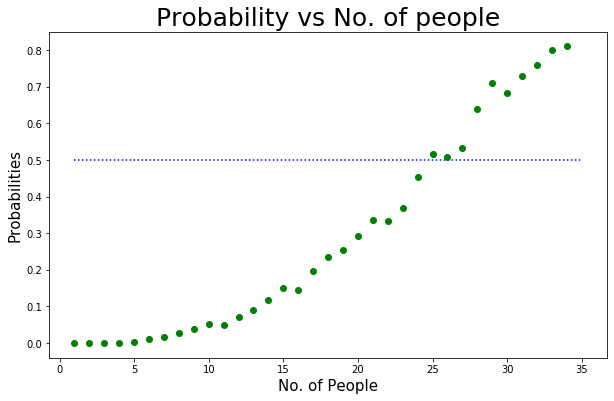

In [10]:
plt.figure(figsize=(10,6)) # Used for changing the plot size
plt.plot(range(1,35),probabilities,'go')
plt.hlines(0.5, 1,35, colors='b', linestyles='dotted')
plt.title('Probability vs No. of people',size=25)
plt.ylabel('Probabilities',size=15)
plt.xlabel('No. of People',size=15)
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Count Vectorizer

In [34]:
text = ['I saw her in the office', 'She looked beautiful',
        'She received an award for her good work']
vectorizer = CountVectorizer()
vec = vectorizer.fit_transform(text)
vec

<3x14 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [35]:
vec.toarray()

array([[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1]], dtype=int64)

In [36]:
vectorizer.get_feature_names()

['an',
 'award',
 'beautiful',
 'for',
 'good',
 'her',
 'in',
 'looked',
 'office',
 'received',
 'saw',
 'she',
 'the',
 'work']

In [37]:
pd.DataFrame(vec.toarray(),columns = vectorizer.get_feature_names())

,an,award,beautiful,for,good,her,in,looked,office,received,saw,she,the,work
0,0,0,0,0,0,1,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,1,0,1,0,1


In [38]:
vectorizer.vocabulary_

{'saw': 10,
 'her': 5,
 'in': 6,
 'the': 12,
 'office': 8,
 'she': 11,
 'looked': 7,
 'beautiful': 2,
 'received': 9,
 'an': 0,
 'award': 1,
 'for': 3,
 'good': 4,
 'work': 13}

## TF-IDF

In [39]:
vectorizer = TfidfVectorizer()

#vectors = vectorizer.fit_transform([documentA, documentB])

vectors = vectorizer.fit_transform(text)

feature_names = vectorizer.get_feature_names()

vec = vectors.toarray()

df = pd.DataFrame(vec, columns=feature_names)
df

,an,award,beautiful,for,good,her,in,looked,office,received,saw,she,the,work
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.355432,0.467351,0.000000,0.467351,0.000000,0.467351,0.000000,0.467351,0.000000
1,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000,0.473630,0.000000,0.000000
2,0.373801,0.373801,0.000000,0.373801,0.373801,0.284285,0.000000,0.000000,0.000000,0.373801,0.000000,0.284285,0.000000,0.373801


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

In [12]:
data = pd.read_csv("C:/Users/skesh/Desktop/Trees/week 5/spam.csv", encoding = "latin-1")

data = data[['v1', 'v2']]

data = data.rename(columns = {'v1': 'label', 'v2': 'text'})
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [14]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

In [15]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)

In [16]:
# training vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [27]:
clf = MultinomialNB(alpha=0.1)

#  Train the classifier
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [28]:
X_test_vec = vectorizer.transform(X_test)

y_pred = clf.predict(X_test_vec) 

In [29]:
X_test.reset_index(drop=True,inplace=True)

In [30]:
print(X_test[44])
clf.predict(X_test_vec[44])

3 free tarot texts! find out about your love life now! try 3 for free! text chance to 85555 16 only! after 3 free, msgs å£1.50 each


array(['spam'], dtype='<U4')

In [31]:
X_test[9]
clf.predict(X_test_vec[9])

array(['ham'], dtype='<U4')

In [32]:
X_test[8]
clf.predict(X_test_vec[8])

array(['ham'], dtype='<U4')